In [72]:
import math, shutil
import pandas as pd
import numpy as np
from haversine import haversine
from scipy import cluster

from matplotlib import pyplot as plt

In [ ]:
def toOFMXGeo( point ):
  result = (0., 0.)
  if point[0] >= 0:
    result[0] = ( ".8f" % point[0] ) + "N"
  else:
    result[0] = ( ".8f" % point[0] ) + "S"

  if point[1] >= 0:
    result[1] = ( ".8f" % point[1] ) + "E"
  else:
    result[1] = ( ".8f" % point[1] ) + "W"

  return result

In [3]:
raw = pd.read_xml( "ofmx_lk/isolated/ofmx_lk.ofmx", xpath="./Abd/Avx" )

data = raw[raw["codeType"] == "CWA"][["geoLatArc", "geoLongArc"]]

data

,geoLatArc,geoLongArc
33,50.06611111N,012.41222222E
46,49.79777778N,012.70694444E
51,50.20305556N,012.91500000E
66,49.56666667N,013.04861111E
67,49.80277778N,013.03805556E
...,...,...
1334,49.69750000N,018.10916667E
1336,49.69611111N,018.11083333E
1340,49.69611111N,018.11083333E
1359,49.92833333N,018.07833333E


In [65]:
latitude = np.array([])
for x in data["geoLatArc"]:
  if x[-1] == "N":
    latitude = np.append(latitude, float( x[0:-1] ) ) 
  else:
    latitude = np.append(latitude, -1 * float( x[0:-1] ) ) 


longitude = np.array([])
for x in data["geoLongArc"]:
  if x[-1] == "E":
    longitude = np.append(longitude, float( x[0:-1] ) ) 
  else:
    longitude = np.append(longitude, -1 * float( x[0:-1] ) )

coords = np.transpose( np.matrix( [latitude, longitude] ) )

In [31]:
coords = np.empty((0,2))

for i, x in data.iterrows():
  row = np.array( [0., 0.] )
  if x["geoLatArc"][-1] == "N":
    row[0] = float( x["geoLatArc"][0:-1] )
  else:
    row[0] = -1 * float( x["geoLatArc"][0:-1] )

  if x["geoLongArc"][-1] == "E":
    row[1] = float( x["geoLongArc"][0:-1] )
  else:
    row[1] = -1 * float( x["geoLongArc"][0:-1] )

  coords = np.vstack( ( coords, np.array( [row] ) ) )

In [38]:
def dist( point1, point2 ):
  return haversine( (point1[0], point1[1]), (point2[0], point2[1]) )


In [45]:
linked = cluster.hierarchy.linkage( coords, "complete", dist )

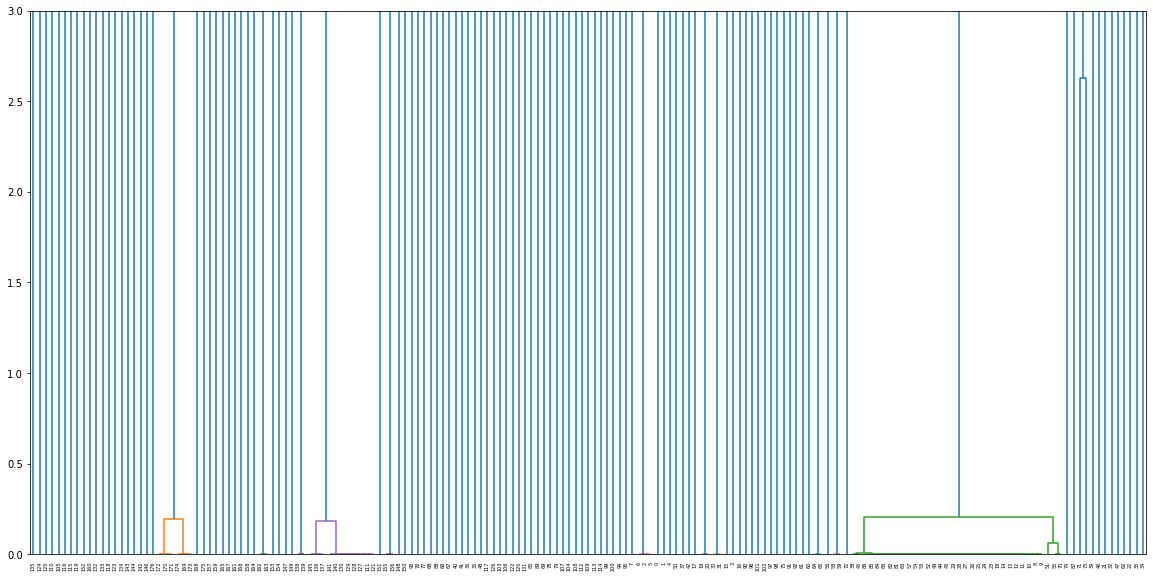

In [70]:
fig = plt.figure(figsize=(20, 10))
dn = cluster.hierarchy.dendrogram(linked, color_threshold =0.5)

plt.gca().set_ylim([0, 3])

plt.show()

In [62]:
clusters = cluster.hierarchy.fcluster( linked, 0.5, "distance" )

In [87]:
dataSplit = {}

for i in range( clusters.size ):
  dataSplit.setdefault(clusters[i], []).append( ( coords[i][0], coords[i][1] ) )

with open('ofmx_lk/isolated/ofmx_lk.ofmx', 'r') as file :
  filedata = file.read()

for i in dataSplit:
  arr = np.unique( dataSplit[i], axis=0, return_counts=True )
  max = arr[0][np.argmax( arr[1] )]

  print( max )
  maxLat, maxLong = "", ""
  if max[0] >= 0:
    maxLat = ( ".8f" % max[0] ) + "N"
  else:
    maxLat = ( ".8f" % max[0] ) + "S"

  if max[1] >= 0:
    maxLong = ( ".8f" % max[1] ) + "E"
  else:
    maxLong = ( ".8f" % max[1] ) + "W"

  for j in arr[0]:
    lat, long = "", ""

    if j[0] >= 0:
      lat = ( ".8f" % j[0] ) + "N"
    else:
      lat = ( ".8f" % j[0] ) + "S"

    if j[1] >= 0:
      long = ( ".8f" % j[1] ) + "E"
    else:
      long = ( ".8f" % j[1] ) + "W"

    filedata = filedata.replace( "<geoLatArc>" + lat + "</geoLatArc>", "<geoLatArc>" + maxLat + "</geoLatArc>" )
    filedata = filedata.replace( "<geoLongArc>" + long + "</geoLongArc>", "<geoLongArc>" + maxLong + "</geoLongArc>" )

    print( [lat, maxLat] )
    print( [long, maxLong] )

with open('ofmx_lk_improved.ofmx', 'w') as file:
  file.write( filedata )


[50.06611111 12.41222222]
['.8fN', '.8fN']
['.8fE', '.8fE']
[49.79777778 12.70694444]
['.8fN', '.8fN']
['.8fE', '.8fE']
[50.20305556 12.915     ]
['.8fN', '.8fN']
['.8fE', '.8fE']
[49.56666667 13.04861111]
['.8fN', '.8fN']
['.8fE', '.8fE']
[49.80277778 13.03805556]
['.8fN', '.8fN']
['.8fE', '.8fE']
[50.30491667 13.14026667]
['.8fN', '.8fN']
['.8fE', '.8fE']
[50.09583333 14.26555556]
['.8fN', '.8fN']
['.8fE', '.8fE']
['.8fN', '.8fN']
['.8fE', '.8fE']
['.8fN', '.8fN']
['.8fE', '.8fE']
['.8fN', '.8fN']
['.8fE', '.8fE']
[49.41833333 13.32194444]
['.8fN', '.8fN']
['.8fE', '.8fE']
[49.67527778 13.27444444]
['.8fN', '.8fN']
['.8fE', '.8fE']
[49.92027778 13.37694444]
['.8fN', '.8fN']
['.8fE', '.8fE']
[49.72305556 13.45222222]
['.8fN', '.8fN']
['.8fE', '.8fE']
[50.3175     13.51277778]
['.8fN', '.8fN']
['.8fE', '.8fE']
[50.46861111 13.46805556]
['.8fN', '.8fN']
['.8fE', '.8fE']
[49.75194444 13.58972222]
['.8fN', '.8fN']
['.8fE', '.8fE']
[50.09416667 13.68888889]
['.8fN', '.8fN']
['.8fE', '.8fE'